In [1]:
from cassL import camb_interface as ci
import copy as cp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
m0 = ci.specify_neutrino_mass(ci.cosm.iloc[0], 0, 0)

In [3]:
k0, z0, p0, s0 = ci.evaluate_cosmology(m0, hubble_units=False)

Let's try to handle this programmatically: let's make an array of key words over which to iterate
for the five parameters
Then let's try values 20% lower and 20% higher than LCDM best fit.

We'll have to handle sigma12 differently

In [4]:
parameters_to_naively_vary = ["ombh2", "omch2", "n_s", "A_s"]
parameters_TeX = ["$\omega_b$", "$\omega_c$", "$n_s$", "$A_s$"]

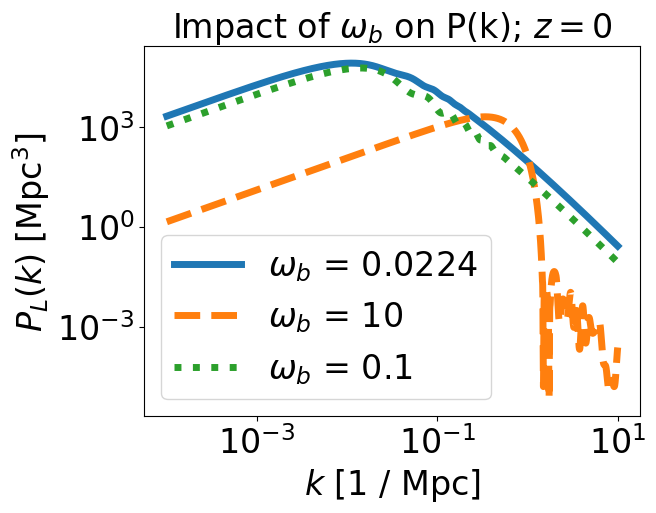

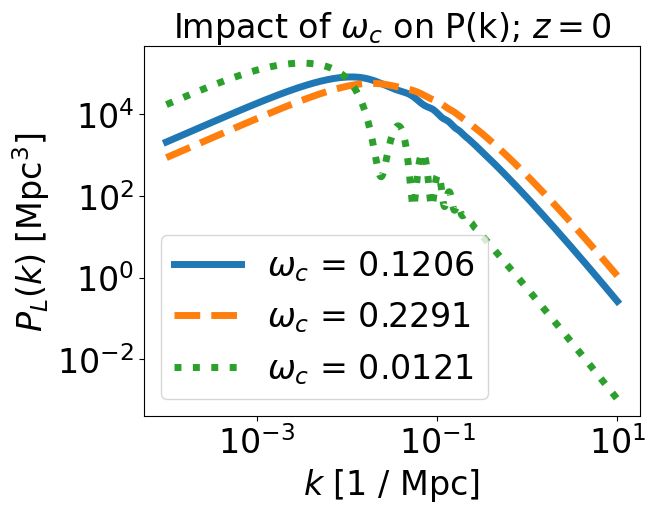

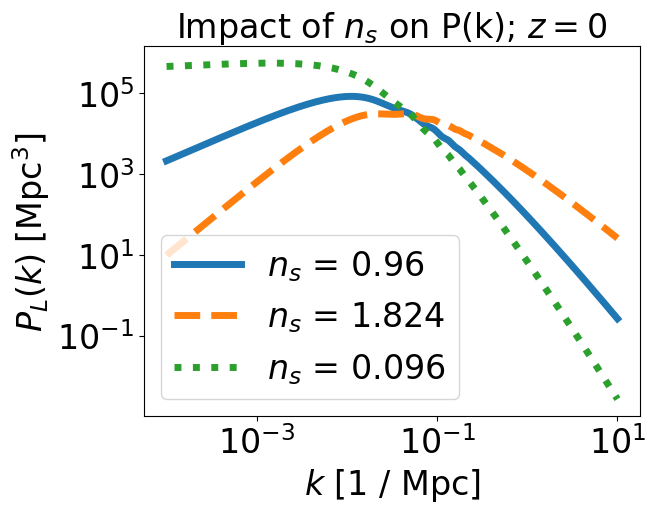

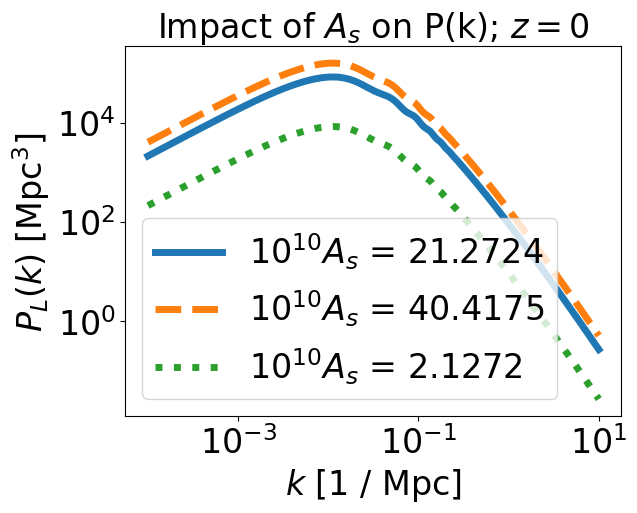

In [5]:
for i in range(len(parameters_to_naively_vary)):
    parameter = parameters_to_naively_vary[i]
    TeX = parameters_TeX[i]
    val0 = m0[parameter]
    
    lo_val = .1 * val0

    if parameter == "ombh2":
        lo_val = 0.1
    
    lo_cosmology = cp.deepcopy(m0)
    lo_cosmology[parameter] = lo_val
    lo_k, lo_z, lo_p, lo_s = ci.evaluate_cosmology(lo_cosmology, hubble_units=False)

    hi_val = 1.9 * val0

    if parameter == "ombh2":
        hi_val = 10
    
    hi_cosmology = cp.deepcopy(m0)
    hi_cosmology[parameter] = hi_val
    hi_k, hi_z, hi_p, hi_s = ci.evaluate_cosmology(hi_cosmology, hubble_units=False)

    fig = plt.figure()
    ax = fig.gca()
    
    ax.set_title("Impact of " + TeX + " on P(k); $z = 0$", fontsize=24)
    ax.set_xlabel("$k$ [1 / Mpc]", fontsize=24)
    ax.set_ylabel("$P_L(k)$ [Mpc$^3$]", fontsize=24)

    if parameter == "A_s":
        val0 *= 10 ** 10
        hi_val *= 10 ** 10
        lo_val *= 10 ** 10
        TeX = "$10^{10} A_s$"
    
    ax.loglog(k0, p0, label=TeX + " = " + str(np.around(val0, 4)),
              linestyle="solid", linewidth=5)
    ax.loglog(hi_k, hi_p, label=TeX + " = " + str(np.around(hi_val, 4)),
               linestyle="dashed", linewidth=5)
    ax.loglog(lo_k, lo_p, label=TeX + " = " + str(np.around(lo_val, 4)),
               linestyle="dotted", linewidth=5)
        
    ax.tick_params(labelsize=24)
    
    #plt.xticks(weight = 'bold')
    plt.legend(fontsize=24)
    
    plt.savefig("plots/" + parameter + "_impact_on_Pk.png", bbox_inches='tight')
    plt.show()

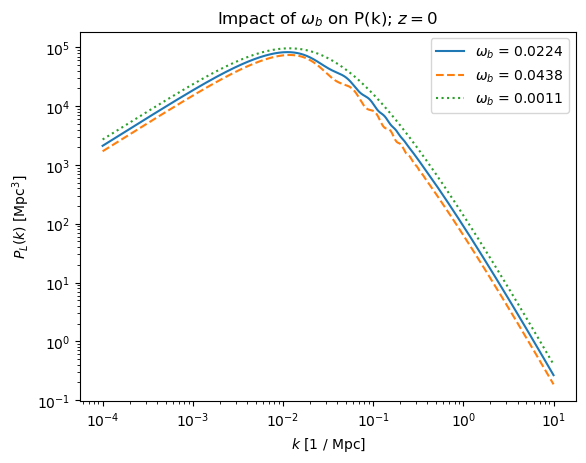

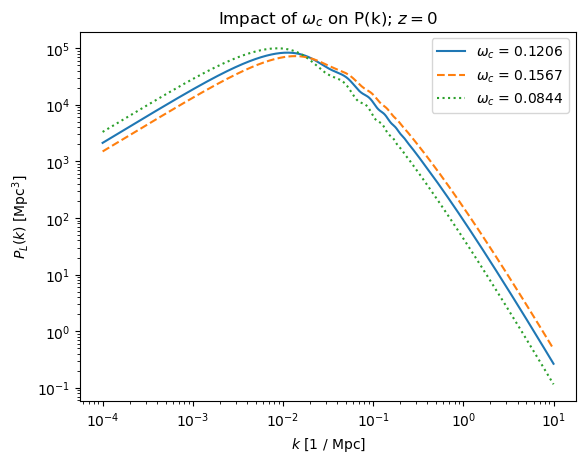

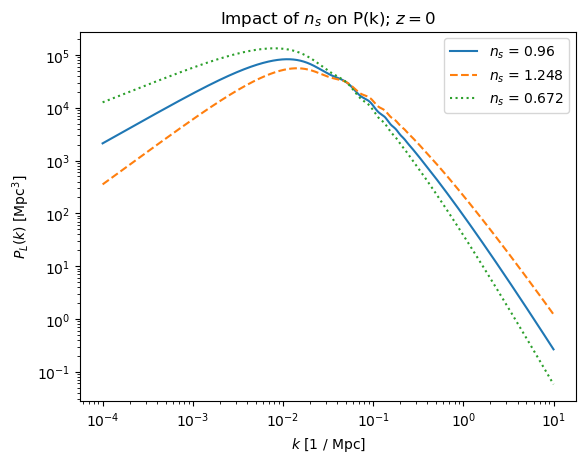

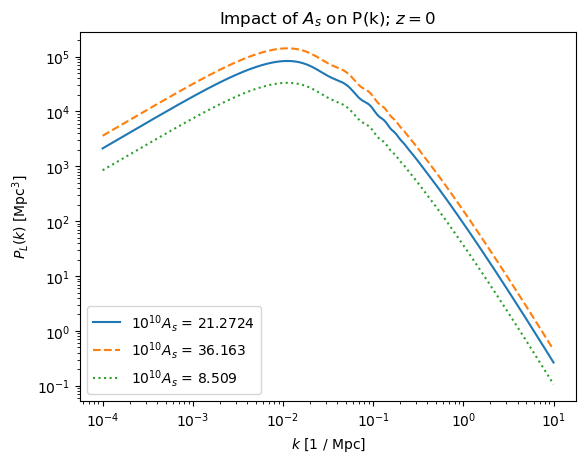

In [6]:
for i in range(len(parameters_to_naively_vary)):
    parameter = parameters_to_naively_vary[i]
    TeX = parameters_TeX[i]
    val0 = m0[parameter]
    
    lo_val = .7 * val0

    if parameter == "ombh2":
        lo_val = .05 * val0

    if parameter == "A_s":
        lo_val = .4 * val0
    
    lo_cosmology = cp.deepcopy(m0)
    lo_cosmology[parameter] = lo_val
    lo_k, lo_z, lo_p, lo_s = ci.evaluate_cosmology(lo_cosmology, hubble_units=False)

    hi_val = 1.3 * val0

    if parameter == "ombh2":
        hi_val = 1.95 * val0

    if parameter == "A_s":
        hi_val = 1.7 * val0
    
    hi_cosmology = cp.deepcopy(m0)
    hi_cosmology[parameter] = hi_val
    hi_k, hi_z, hi_p, hi_s = ci.evaluate_cosmology(hi_cosmology, hubble_units=False)

    fig = plt.figure()
    ax = fig.gca()
    
    ax.set_title("Impact of " + TeX + " on P(k); $z = 0$")
    ax.set_xlabel("$k$ [1 / Mpc]")
    ax.set_ylabel("$P_L(k)$ [Mpc$^3$]")

    if parameter == "A_s":
        val0 *= 10 ** 10
        hi_val *= 10 ** 10
        lo_val *= 10 ** 10
        TeX = "$10^{10} A_s$"
    
    ax.loglog(k0, p0, label=TeX + " = " + str(np.around(val0, 4)),
              linestyle="solid")
    ax.loglog(hi_k, hi_p, label=TeX + " = " + str(np.around(hi_val, 4)),
               linestyle="dashed")
    ax.loglog(lo_k, lo_p, label=TeX + " = " + str(np.around(lo_val, 4)),
               linestyle="dotted")
        
    #ax.tick_params(labelsize=24)
    
    #plt.xticks(weight = 'bold')
    plt.legend()
    
    plt.savefig("plots/" + parameter + "_impact_on_Pk.png", bbox_inches='tight')
    plt.show()

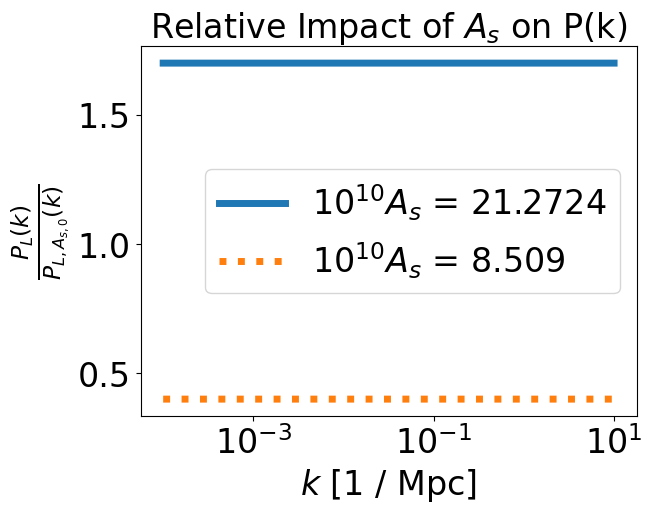

In [7]:
i = 3
parameter = parameters_to_naively_vary[i]
TeX = parameters_TeX[i]
val0 = m0[parameter]

lo_val = .4 * val0

lo_cosmology = cp.deepcopy(m0)
lo_cosmology[parameter] = lo_val
lo_k, lo_z, lo_p, lo_s = ci.evaluate_cosmology(lo_cosmology, hubble_units=False)

hi_val = 1.7 * val0

hi_cosmology = cp.deepcopy(m0)
hi_cosmology[parameter] = hi_val
hi_k, hi_z, hi_p, hi_s = ci.evaluate_cosmology(hi_cosmology, hubble_units=False)

fig = plt.figure()
ax = fig.gca()

ax.set_title("Relative Impact of " + TeX + " on P(k)", fontsize=24)
ax.set_xlabel("$k$ [1 / Mpc]", fontsize=24)
ax.set_ylabel(r"$\frac{P_L(k)}{P_{L, A_{s, 0}}(k)}$", fontsize=24)

if parameter == "A_s":
    val0 *= 10 ** 10
    hi_val *= 10 ** 10
    lo_val *= 10 ** 10
    TeX = "$10^{10} A_s$"

ax.plot(k0, hi_p / p0, label=TeX + " = " + str(np.around(val0, 4)),
          linestyle="solid", linewidth=5)
#ax.loglog(hi_k, hi_p, label=TeX + " = " + str(np.around(hi_val, 4)),
#           linestyle="dashed")
ax.plot(k0, lo_p / p0, label=TeX + " = " + str(np.around(lo_val, 4)),
           linestyle="dotted", linewidth=5)
ax.set_xscale('log')

ax.tick_params(labelsize=24)

#plt.xticks(weight = 'bold')
plt.legend(fontsize=24)

plt.savefig("plots/" + parameter + "_relative_impact_on_Pk.png", bbox_inches='tight')
plt.show()

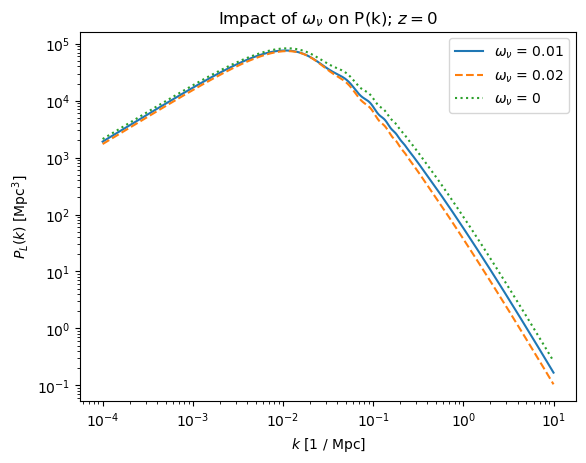

In [8]:
parameter = "omnuh2"
TeX = r"$\omega_\nu$"
hi_val = 0.02
med_val = 0.01
lo_val = 0

hi_cosmology = ci.specify_neutrino_mass(m0, hi_val, 1)
hi_k, hi_z, hi_p, hi_s = ci.evaluate_cosmology(hi_cosmology, hubble_units=False)

med_cosmology = ci.specify_neutrino_mass(m0, med_val, 1)
med_k, med_z, med_p, med_s = ci.evaluate_cosmology(med_cosmology, hubble_units=False)

lo_cosmology = cp.deepcopy(m0)
lo_k, lo_z, lo_p, lo_s = ci.evaluate_cosmology(lo_cosmology, hubble_units=False)

fig = plt.figure()
ax = fig.gca()

ax.set_title("Impact of " + TeX + " on P(k); $z = 0$")
ax.set_xlabel("$k$ [1 / Mpc]")
ax.set_ylabel("$P_L(k)$ [Mpc$^3$]")

ax.loglog(med_k, med_p, label=TeX + " = " + str(np.around(med_val, 4)),
          linestyle="solid")
ax.loglog(hi_k, hi_p, label=TeX + " = " + str(np.around(hi_val, 4)),
           linestyle="dashed")
ax.loglog(lo_k, lo_p, label=TeX + " = " + str(np.around(lo_val, 4)),
           linestyle="dotted")
    
#ax.tick_params(labelsize=24)

#plt.xticks(weight = 'bold')
plt.legend()

plt.savefig("plots/" + parameter + "_impact_on_Pk.png", bbox_inches='tight')
plt.show()

In [9]:
ci.specify_neutrino_mass?

Signature: ci.specify_neutrino_mass(mlc, omnuh2_in, nnu_massive_in=1)
Docstring:
Helper function for input_cosmology.
This returns modified copy (and therefore does not mutate the original) of
the input dictionary object, which corresponds to a cosmology with massive
neutrinos.
File:      c:\users\lfinkbei\documents\github\master\cassl\camb_interface.py
Type:      function

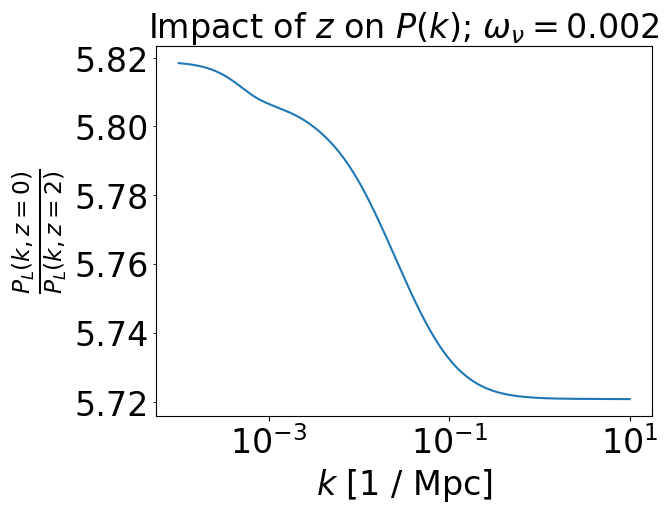

In [10]:
TeX = r"$z$"
the_val = 0.002

lo_val = 0
hi_val = 2

the_cosmology = ci.specify_neutrino_mass(m0, the_val, 1)
new_k_nu, new_z_nu, new_p_nu, new_s_nu = ci.evaluate_cosmology(the_cosmology, hubble_units=False)
old_k_nu, old_z_nu, old_p_nu, old_s_nu = ci.evaluate_cosmology(the_cosmology, redshifts=[2], hubble_units=False)

fig = plt.figure()
ax = fig.gca()

ax.set_title("Impact of " + TeX + r" on $P(k)$; $\omega_\nu = 0.002$", fontsize=24)
ax.set_xlabel("$k$ [1 / Mpc]", fontsize=24)
#ax.set_ylabel("$\frac{1}{2}$")
#ax.set_ylabel(r"$\frac{P_L(k, z = 2)}{P_L(k, z = 0)}$", fontsize=24)
ax.set_ylabel(r"$\frac{P_L(k, z = 0)}{P_L(k, z = 2)}$", fontsize=24)

#ax.loglog(new_k, new_p, label=TeX + " = " + str(np.around(lo_val, 4)),
#          linestyle="solid")
#ax.loglog(old_k, old_p, label=TeX + " = " + str(np.around(hi_val, 4)),
#           linestyle="dashed")

#ax.loglog(old_k, old_p / new_p)
rat_nu = new_p_nu / old_p_nu

ax.loglog(old_k_nu, new_p_nu / old_p_nu)

#ax.ticklabel_format(axis='y', style='plain')

from matplotlib.ticker import ScalarFormatter
plt.gca().yaxis.set_major_formatter(ScalarFormatter()) 
plt.gca().yaxis.set_minor_formatter(ScalarFormatter());

ax.tick_params(labelsize=24)

for tick in ax.yaxis.get_minor_ticks():
    tick.label1.set_fontsize(24) 

#plt.xticks(weight = 'bold')
# plt.legend()

plt.savefig("plots/redshift_dependence_neutrinos", bbox_inches='tight')
plt.show()

In [11]:
y_limits = ax.get_ylim()

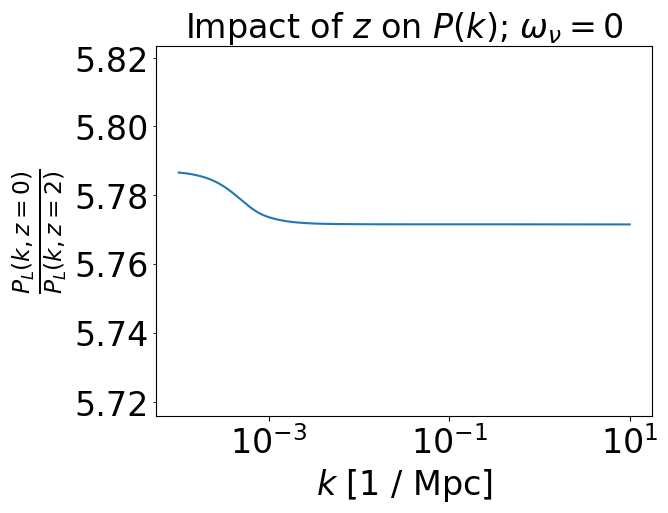

In [14]:
TeX = r"$z$"
the_val = 0

lo_val = 0
hi_val = 1100

the_cosmology = ci.specify_neutrino_mass(m0, the_val, 0)
new_k_no, new_z_no, new_p_no, new_s_no = ci.evaluate_cosmology(the_cosmology, hubble_units=False)
old_k_no, old_z_no, old_p_no, old_s_no = ci.evaluate_cosmology(the_cosmology, redshifts=[2], hubble_units=False)

fig = plt.figure()
ax = fig.gca()

ax.set_title("Impact of " + TeX + r" on $P(k)$; $\omega_\nu = 0$", fontsize=24)
ax.set_xlabel("$k$ [1 / Mpc]", fontsize=24)
#ax.set_ylabel("$\frac{1}{2}$")
#ax.set_ylabel(r"$\frac{P_L(k, z = 2)}{P_L(k, z = 0)}$", fontsize=24)
ax.set_ylabel(r"$\frac{P_L(k, z = 0)}{P_L(k, z = 2)}$", fontsize=24)

#ax.loglog(new_k, new_p, label=TeX + " = " + str(np.around(lo_val, 4)),
#          linestyle="solid")
#ax.loglog(old_k, old_p, label=TeX + " = " + str(np.around(hi_val, 4)),
#           linestyle="dashed")

#ax.loglog(old_k, old_p / new_p)
rat_no = new_p_no / old_p_no
ax.loglog(old_k_no, rat_no)

#ax.ticklabel_format(axis='y', style='plain')

ax.set_ylim(y_limits)

from matplotlib.ticker import ScalarFormatter
plt.gca().yaxis.set_major_formatter(ScalarFormatter()) 
plt.gca().yaxis.set_minor_formatter(ScalarFormatter());

ax.tick_params(labelsize=24)

for tick in ax.yaxis.get_minor_ticks():
    tick.label1.set_fontsize(24) 

#plt.xticks(weight = 'bold')
# plt.legend()

plt.savefig("plots/redshift_dependence_no_neutrinos", bbox_inches='tight')
plt.show()

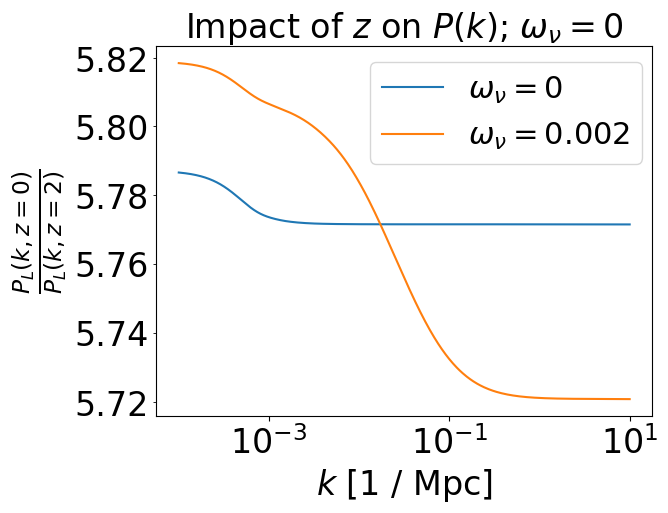

In [15]:
TeX = r"$z$"

fig = plt.figure()
ax = fig.gca()

ax.set_title("Impact of " + TeX + r" on $P(k)$; $\omega_\nu = 0$", fontsize=24)
ax.set_xlabel("$k$ [1 / Mpc]", fontsize=24)
ax.set_ylabel(r"$\frac{P_L(k, z = 0)}{P_L(k, z = 2)}$", fontsize=24)

rat_no = new_p_no / old_p_no
ax.loglog(old_k_no, rat_no, label=r"$\omega_\nu = 0$")
ax.loglog(old_k_nu, rat_nu, label=r"$\omega_\nu = 0.002$")

#ax.ticklabel_format(axis='y', style='plain')

ax.set_ylim(y_limits)

from matplotlib.ticker import ScalarFormatter
plt.gca().yaxis.set_major_formatter(ScalarFormatter()) 
plt.gca().yaxis.set_minor_formatter(ScalarFormatter());

ax.tick_params(labelsize=24)

for tick in ax.yaxis.get_minor_ticks():
    tick.label1.set_fontsize(24) 

#fig.legend(loc='upper right', fontsize=24)
ax.legend(bbox_to_anchor=(0.4, 1), fontsize=22)


plt.savefig("plots/redshift_dependence_problem", bbox_inches='tight')
plt.show()